# Linear regression

The objective of linear algebra is to calculate relationships of points in vector space. 

Simple linear regression is used to find the best fit line of a dataset. 

If the data isn't continuous, there really isn't going to be a best fit line.

### Finding the best-fit line

The definition of a simple straight line: 

$$y = mx + b$$ 

where m is the slope and b is the y-intercept. 


This would be the equation used to discover y, and we could rearrange it instead to discover x using basic algebraic principles: 

$$ x = \frac{y-b}{m} $$

### Finding the slope

The slope, `m`, of the best-fit line is defined as:

$$m = \frac{\overline{x} * \overline{y} - \overline{xy}}{(\overline{x})^2 - \overline{x^2}}$$

The bar over the letters signifies a mean/average. 

If two letters are sitting next to eachother, you multiply them. 

The xs and ys are from all of the existing coordinates.

### Finding the y intercept

$$ b = \overline{y} - \overline{m}x $$

In [2]:
from statistics import mean
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import style

style.use('ggplot')

In [3]:
xs = np.array([1,2,3,4,5], dtype=np.float64)
ys = np.array([5,4,6,5,6], dtype=np.float64)

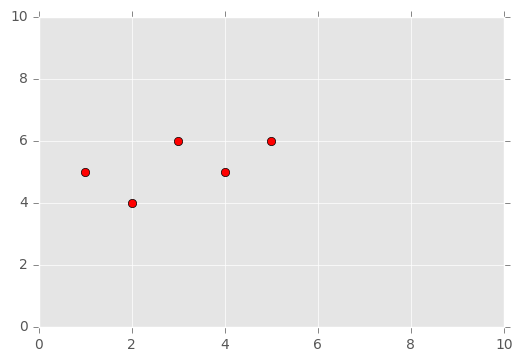

In [4]:
plt.plot(xs, ys, 'ro')
plt.axis([0,10,0,10])
plt.show()

In [5]:
def best_fit_slope_and_intercept(xs,ys):
    m = (((mean(xs)*mean(ys)) - mean(xs*ys)) /
         ((mean(xs)*mean(xs)) - mean(xs*xs)))
    
    b = mean(ys) - m*mean(xs)
    
    return m, b

In [6]:
m, b = best_fit_slope_and_intercept(xs,ys)
print(m)
print(b)

0.3
4.3


## Regression line
Recall that `y=mx+b.`

In [7]:
# Apply to each of the coordinates in xs
regression_line = [(m*x)+b for x in xs]

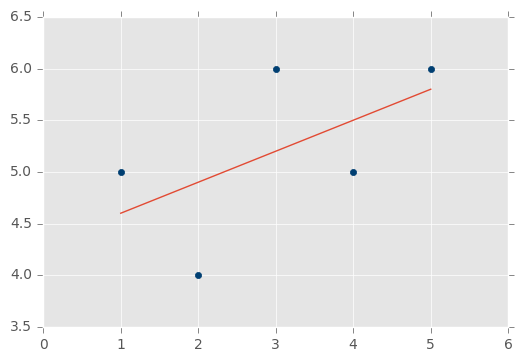

In [8]:
# Plot scatter plot of existing data
plt.scatter(xs,ys,color='#003F72')

# Create regression line
plt.plot(xs, regression_line)
plt.show()

## Prediction time!

Now that we have the slope `m` and the `y` intercept `b`, we can make predictions of `y` given `x`.

$$y = mx + b$$ 

In [9]:
predict_x = 7
predict_y = (m * predict_x) +b

print(predict_y)

6.4


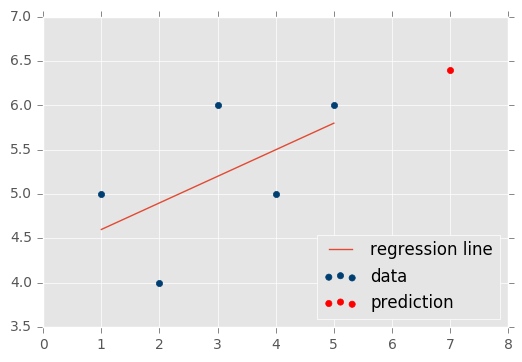

In [10]:
plt.scatter(xs,ys,color='#003F72',label='data')
plt.scatter(predict_x, predict_y, color='r', label='prediction')

plt.plot(xs, regression_line, label='regression line')
plt.legend(loc=4)
plt.show()

## Finding errors

The standard way to check for errors is by using `squared errors`. 

You will hear this method either called `r squared` or the `coefficient of determination`. 

So what is squared error?

The distance between the regression line's y values, and the data's y values is the error, squared. 

The line's squared error is either a mean or a sum of this.

### Why square errors?

First, we want a way to normalize the error as a distance, so the error might be -5, but, when squared, that's a positive number. 

Another reason is to further punish for outliers. 

The "further" off something is, the more the it affects the error. 


In [11]:
def squared_error(ys_orig,ys_line):
    return sum((ys_line - ys_orig) * (ys_line - ys_orig))

With the above function, we can calculate the squared error of any line to datapoints, so we can use this sort of syntax for both the regression line and the mean of the ys.

## r squared

Squared error is totally relative to the dataset, so we need something more. 

That's where "r squared" comes in, also called the "coefficient of determination." The equation for this is:

$$ r^2 = 1 - \frac{SE\hat{y}}{SE\overline{y}} $$

The equation is: 1 minus the division of the squared error of the regression line and the squared error of the mean y line. 

The mean y line is the mean of all of the y values from the dataset. 

If you were to graph it, then it would be a flat, horizontal, line. Thus, we do the squared error of the average y, and of the regression line. 

The objective here is to discern how much of the error is actually just simply a result in variation in the data features, as opposed to being a result of the regression line being a poor fit.


So, the coefficient of determination is the above equation, what do you think is good or bad? We see it's a 1 minus something. Typically, in math, when you see this, the objective is to return a percentage, some number between 0 and 1. What do you think would be a good r-squared/coefficient of determination? Let's say the answer to r-squared here is 0.8. Is that good or bad? Is it better or worse than 0.3? For r-squared to be 0.8, that means the division of the squared error of the regression line and the squared error of the mean of the ys was 0.2. Something like 2/10. That means the error of the regression line was far less than the error of the mean of the ys. Sounds like a good thing to me. Thus, 0.8 is pretty good.


What about compared to 0.3 as the value for the coefficient of determination? In that case, that would mean that the squared error of the regression line divided by the squared error of the mean of the ys line was 0.7. Something like 7/10 would generate this, where 7, in terms of being divided by 10 is far worse than the previous 2 divided by 10, where 7 and 2 are the squared errors of the regression line. Thus, the goal is to have the r squared value, otherwise called the coefficient of determination, as close to 1 as possible.

In [12]:
def coefficient_of_determination(ys_orig,ys_line):
    y_mean_line = [mean(ys_orig) for y in ys_orig]
    squared_error_regr = squared_error(ys_orig, ys_line)
    squared_error_y_mean = squared_error(ys_orig, y_mean_line)
    return 1 - (squared_error_regr/squared_error_y_mean)

In [13]:
r_squared = coefficient_of_determination(ys,regression_line)
print(r_squared)

0.321428571429


That's a pretty low value, so actually our best-fit line isn't all that great according to this measure.

Perhaps the reason for the `low coefficient of determination` value was because the variation in y was actually quite large.

## Testing

Our assumption is that we created a best fit line, which we then tested with a coefficient of determination method.

We know (mathematically) that the r squared value will be lower when the best-fit line is worse, and higher (closer to 1), when the best fit line is better. 

Our assumption is that we've built a system that works this way. Our system has many parts, and even a simple order of operations error would throw everything out of the window. 

How could we test our algorithm's behaviors, so that we're confident everything is working as intended?

### Creating test dataset

We will create a sample dataset for testing. If we have a positively correlated dataset, where the correlation is quite strong and tight, then r squared should be higher, than if the correlation is weaker and points are not as tightly conformed.

In [24]:
from random import randrange

def create_dataset(size, variance, step=2, correlation=False):
    val = 1
    ys = list()
    for i in range(size):
        y = val + randrange(-variance,variance)
        ys.append(y)
        if correlation and correlation == 'pos':
            val += step
        elif correlation and correlation == 'neg':
            val -= step

    xs = [i for i in range(len(ys))]
    
    return np.array(xs, dtype=np.float64), np.array(ys, dtype=np.float64)

### Plotting test dataset

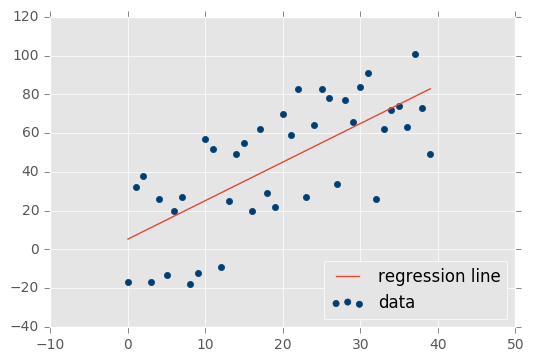

In [20]:
xs, ys = create_dataset(size=40, variance=40, step=2, correlation='pos')

m, b = best_fit_slope_and_intercept(xs,ys)
regression_line = [(m*x)+b for x in xs]

plt.scatter(xs,ys,color='#003F72', label = 'data')
plt.plot(xs, regression_line, label = 'regression line')
plt.legend(loc=4)
plt.show()

### Calculating error (r squared) of test dataset

In [21]:
r_squared = coefficient_of_determination(ys,regression_line)
print(r_squared)

0.498554677493


### Test again! (lower variance)

So our assumption is that our r-squared/coefficient of determination should improve if we made the dataset a more tightly correlated dataset. How would we do that? Simple: lower the variance.

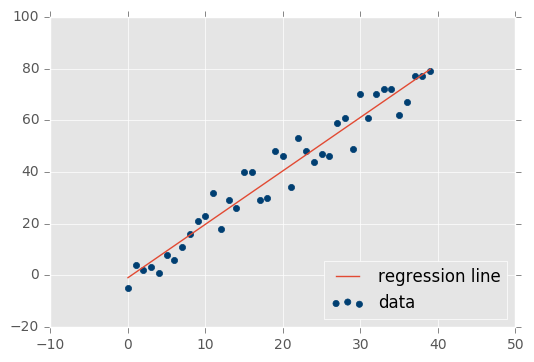

In [22]:
xs, ys = create_dataset(size=40, variance=10, step=2, correlation='pos')

m, b = best_fit_slope_and_intercept(xs,ys)
regression_line = [(m*x)+b for x in xs]

plt.scatter(xs,ys,color='#003F72', label = 'data')
plt.plot(xs, regression_line, label = 'regression line')
plt.legend(loc=4)
plt.show()

In [23]:
r_squared = coefficient_of_determination(ys, regression_line)
print(r_squared)

0.947439601863


Now our `coefficient_of_determination` is much higher in accordance with the lower variance. We could also test negative correlation with the same variance, which should produce a similarly high number, and `correlation=False` which should produce a very low number.